I want to start with a prior over the changepoints and a prior over the observations and infer a posterior distribution of periodizations and linear trends through monte-carlo methods

In [33]:
import numpy as np
import cv2
import scipy.stats

import matplotlib.pyplot as plt

import os
import sys
sys.path.append('..')

import image_measures
import visual_plot
import changepoint_estimation

In [3]:
# path to your wikiart images folder
wikiart_path = '/media/sam/bbdb3901-f357-4a4f-b198-3102f6046fab/wikiart/images/'

In [9]:
artist_name = 'mark-rothko'

In [19]:
image_paths = []
years = []
names = []
for path in os.listdir(wikiart_path):
    if path == artist_name:
        subdir = [os.path.join(dp, f) for dp, dn, fn in os.walk(os.path.expanduser(wikiart_path + path)) for f in fn]
        images = [s for s in subdir if s.split('.')[-1] in ('jpg', 'gif', 'png')]
        image_paths += images
        years += [i.split('/')[-2] for i in images]
        names += [i.split('/')[-3] for i in images]

In [20]:
years = np.array([np.nan if y == 'unknown-year' else int(y) for y in years])

In [11]:
# compute colorfulness and complexity scores for the images we've selected

colorfulness = []
complexity = []
for i,image_path in enumerate(image_paths):
    try:
        colorfulness.append(image_measures.colorfulness(cv2.imread(image_path)))
        complexity.append(image_measures.complexity(cv2.imread(image_path)))
    except Exception as e:
        print(e)
        print(image_path)
        colorfulness.append(np.nan)
        complexity.append(np.nan)

In [42]:
# prior for measure

complexity_std = 5
colorfulness_std = 5

# prior for periodization
n_years = np.nanmax(years) - np.nanmin(years)
p_split = np.ones(int(n_years)) / n_years

<ErrorbarContainer object of 3 artists>

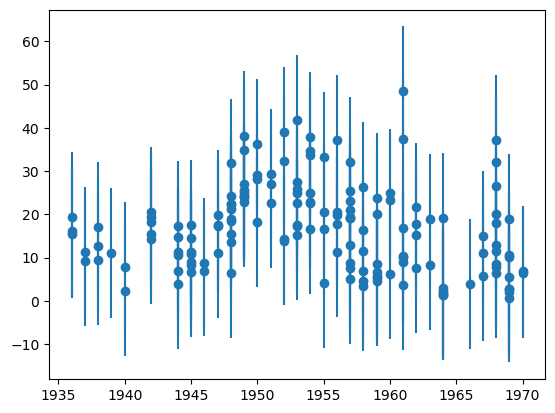

<ErrorbarContainer object of 3 artists>

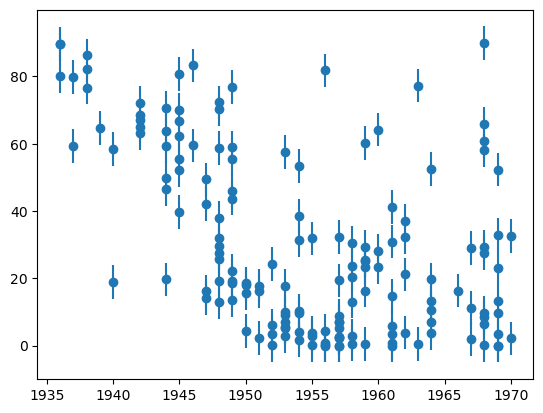

In [32]:
plt.errorbar(years, complexity, yerr=[complexity_std] * len(complexity), fmt="o")

In [43]:
results = []
for sample in range(1000):
    colorfulness_sample = np.random.normal(0,colorfulness_std, len(colorfulness)) + np.array(colorfulness)
    mask = ~np.isnan(colorfulness_sample) & ~np.isnan(years)
    boundaries, stderr = changepoint_estimation.find_changepoints(years[mask], colorfulness_sample[mask], 3)
    print(boundaries, stderr)
    results.append(boundaries)

[1949.0, 1958.0, 1962.0] 12715.54032619099
[1949.0, 1955.0, 1963.0] 11972.186166881767
[1949.0, 1960.0, 1967.0] 14985.293574583284
[1946.0, 1949.0, 1966.0] 11324.54764953124
[1944.0, 1951.0, 1967.0] 13487.004540052634
[1949.0, 1960.0, 1967.0] 12997.743296228631
[1949.0, 1960.0, 1967.0] 11854.81550106835
[1945.0, 1951.0, 1967.0] 14349.771242582734
[1947.0, 1955.0, 1967.0] 11595.285645414384
[1949.0, 1960.0, 1967.0] 12168.93957623251
[1948.0, 1955.0, 1967.0] 15238.93188901747
[1938.0, 1949.0, 1967.0] 12031.495883867638
[1948.0, 1954.0, 1958.0] 13291.74252254752
[1949.0, 1960.0, 1967.0] 15825.496761331087
[1942.0, 1949.0, 1967.0] 12443.889906560933
[1949.0, 1960.0, 1967.0] 12404.113703988305
[1946.0, 1950.0, 1966.0] 12716.694615024442
[1946.0, 1950.0, 1967.0] 11933.418950774216
[1947.0, 1955.0, 1967.0] 13201.67837680001
[1949.0, 1955.0, 1967.0] 13537.843133165916
[1949.0, 1955.0, 1967.0] 14491.6447901238
[1947.0, 1955.0, 1963.0] 12343.67813192683
[1949.0, 1960.0, 1967.0] 13457.56343701005

[1949.0, 1958.0, 1963.0] 14190.255793887034
[1947.0, 1958.0, 1961.0] 14555.944683250209
[1946.0, 1951.0, 1967.0] 14719.964874636958
[1944.0, 1952.0, 1967.0] 12585.441419077933
[1949.0, 1960.0, 1966.0] 14166.118745457821
[1949.0, 1961.0, 1967.0] 14782.49853513431
[1946.0, 1950.0, 1966.0] 12754.145993151416
[1947.0, 1955.0, 1967.0] 14317.111462206973
[1946.0, 1951.0, 1967.0] 13173.577486460232
[1949.0, 1961.0, 1966.0] 13078.11771049762
[1945.0, 1951.0, 1967.0] 14849.107564634205
[1948.0, 1955.0, 1962.0] 12476.815198955914
[1949.0, 1960.0, 1966.0] 13460.771367089164
[1955.0, 1960.0, 1966.0] 14689.335889336988
[1949.0, 1960.0, 1967.0] 13674.218826821165
[1946.0, 1949.0, 1967.0] 13716.925540600481
[1949.0, 1961.0, 1966.0] 12795.616327842909
[1955.0, 1960.0, 1967.0] 15772.282653760654
[1947.0, 1950.0, 1967.0] 13106.07212692755
[1945.0, 1949.0, 1967.0] 12108.30167010166
[1949.0, 1960.0, 1966.0] 11311.486638376558
[1949.0, 1960.0, 1967.0] 12299.32697018598
[1949.0, 1960.0, 1966.0] 13350.643935

[1947.0, 1957.0, 1959.0] 13595.978274568126
[1949.0, 1960.0, 1967.0] 12395.796456105429
[1949.0, 1960.0, 1967.0] 14297.500407610309
[1942.0, 1949.0, 1967.0] 12309.421465978108
[1947.0, 1955.0, 1967.0] 13051.061214642643
[1944.0, 1949.0, 1967.0] 12882.620544587822
[1948.0, 1957.0, 1963.0] 13972.181074339263
[1949.0, 1961.0, 1967.0] 11415.256152268063
[1949.0, 1961.0, 1967.0] 13696.373123888548
[1949.0, 1961.0, 1966.0] 13233.412978372027
[1949.0, 1961.0, 1967.0] 15397.196091353679
[1947.0, 1955.0, 1967.0] 13402.823484675897
[1946.0, 1950.0, 1967.0] 14970.616579769667
[1955.0, 1960.0, 1967.0] 14699.40948250683
[1947.0, 1955.0, 1967.0] 13940.285063149126
[1949.0, 1961.0, 1966.0] 11672.64555266135
[1946.0, 1950.0, 1966.0] 13847.309806921221
[1949.0, 1961.0, 1966.0] 12965.995168036628
[1946.0, 1950.0, 1966.0] 14079.730918416177
[1947.0, 1955.0, 1967.0] 13464.309936026619
[1949.0, 1961.0, 1966.0] 16346.048137044421
[1949.0, 1961.0, 1967.0] 13214.750114947175
[1947.0, 1951.0, 1967.0] 12617.288

[1949.0, 1960.0, 1967.0] 12669.80257230669
[1949.0, 1961.0, 1967.0] 14102.846579922516
[1949.0, 1960.0, 1966.0] 14194.499655782984
[1949.0, 1958.0, 1963.0] 15199.365623506019
[1947.0, 1955.0, 1967.0] 14045.787702940439
[1949.0, 1961.0, 1964.0] 13389.092830720805
[1949.0, 1958.0, 1961.0] 13814.573660870756
[1947.0, 1955.0, 1967.0] 12702.4617438335
[1949.0, 1960.0, 1967.0] 13555.07756502157
[1949.0, 1960.0, 1967.0] 13136.087332423107
[1947.0, 1949.0, 1967.0] 12235.595944410601
[1944.0, 1949.0, 1967.0] 13193.467958362684
[1949.0, 1960.0, 1967.0] 13785.750434697478
[1942.0, 1949.0, 1967.0] 13519.845403782174
[1944.0, 1952.0, 1967.0] 11212.02078735144
[1949.0, 1960.0, 1967.0] 12272.580675138195
[1949.0, 1960.0, 1967.0] 11566.527699224931
[1949.0, 1961.0, 1966.0] 12606.908583336673
[1949.0, 1961.0, 1967.0] 14071.755472624573
[1949.0, 1961.0, 1967.0] 14018.20734591303
[1949.0, 1960.0, 1967.0] 13246.761873064095
[1949.0, 1960.0, 1966.0] 12801.037731452943
[1949.0, 1960.0, 1966.0] 13693.7870317

[1949.0, 1958.0, 1963.0] 12561.583246371305
[1946.0, 1949.0, 1967.0] 14734.091098026427
[1940.0, 1944.0, 1948.0] 14553.388587672656
[1949.0, 1961.0, 1967.0] 13061.010316561844
[1948.0, 1955.0, 1967.0] 13475.51298691584
[1938.0, 1949.0, 1967.0] 12563.46209689667
[1949.0, 1960.0, 1967.0] 13537.278731466558
[1948.0, 1955.0, 1967.0] 11853.4769004874
[1946.0, 1949.0, 1966.0] 14043.151366956778
[1949.0, 1961.0, 1967.0] 12785.11112014817
[1949.0, 1961.0, 1967.0] 14633.179410535651
[1949.0, 1960.0, 1967.0] 12204.442608550613
[1946.0, 1951.0, 1966.0] 13967.257793393857
[1944.0, 1949.0, 1967.0] 13093.156701416256
[1947.0, 1951.0, 1967.0] 13096.023524032647
[1948.0, 1955.0, 1967.0] 13773.42678870903
[1949.0, 1960.0, 1967.0] 14241.767323540558
[1944.0, 1949.0, 1967.0] 12596.42997461414
[1949.0, 1960.0, 1967.0] 13743.958049905654
[1949.0, 1959.0, 1963.0] 13887.913579010194
[1949.0, 1960.0, 1967.0] 12174.470399954158
[1949.0, 1961.0, 1966.0] 15031.397392880943
[1949.0, 1961.0, 1967.0] 13073.60916713

[1949.0, 1961.0, 1967.0] 15259.089029024051
[1949.0, 1960.0, 1967.0] 11917.819226006273
[1942.0, 1949.0, 1967.0] 14744.723488156034
[1946.0, 1950.0, 1967.0] 12743.14757680082
[1947.0, 1955.0, 1967.0] 13820.831234437737
[1947.0, 1955.0, 1967.0] 11931.105324088476
[1949.0, 1960.0, 1967.0] 14376.375365069616
[1949.0, 1955.0, 1967.0] 13296.412586382223
[1947.0, 1955.0, 1967.0] 11136.233276531973
[1949.0, 1958.0, 1962.0] 12360.163910920532
[1949.0, 1961.0, 1966.0] 13553.803615186669
[1949.0, 1960.0, 1967.0] 14795.98271707379
[1949.0, 1961.0, 1967.0] 13761.649304722012
[1949.0, 1960.0, 1967.0] 12666.011899117704
[1949.0, 1955.0, 1967.0] 11235.933387859664
[1949.0, 1960.0, 1967.0] 12240.421517418066
[1945.0, 1949.0, 1967.0] 12220.206307609973
[1949.0, 1960.0, 1967.0] 14422.303289601969
[1949.0, 1960.0, 1967.0] 12106.287191963787
[1949.0, 1960.0, 1967.0] 13097.185938430273
[1944.0, 1949.0, 1967.0] 13295.454207722272
[1949.0, 1960.0, 1967.0] 10502.755452288133
[1949.0, 1960.0, 1967.0] 14430.567

In [44]:
results = np.array(results)

In [48]:
results.mean(axis=0), results.std(axis=0)

(array([1947.672, 1956.395, 1966.084]),
 array([2.44834965, 4.78424236, 2.36494059]))

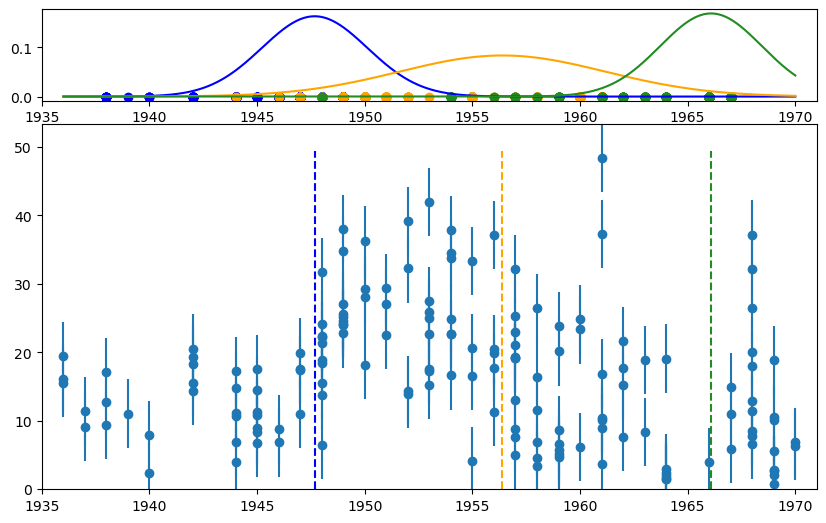

In [78]:
fig = plt.figure(figsize=(10,6))
gs = fig.add_gridspec(2, 1, height_ratios=(1, 4),
                      bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.1)

ax = fig.add_subplot(gs[1, 0])
ax_hist = fig.add_subplot(gs[0, 0], sharex=ax)
ax.errorbar(years, colorfulness, yerr=[colorfulness_std] * len(colorfulness), fmt="o")
ax.set_xlim(np.nanmin(years) - 1, np.nanmax(years) + 1)
ax.set_ylim(0, np.nanmax(colorfulness) + colorfulness_std)
colors = ['blue', 'orange', 'forestgreen']
for cp in range(3):
    ax_hist.scatter(results[:,cp], [0] * len(results), c=colors[cp])
    mean = results[:,cp].mean()
    std = results[:,cp].std()
    sup = np.linspace(np.nanmin(years), np.nanmax(years), 1000)
    ax_hist.plot(sup, scipy.stats.norm.pdf(sup, mean, std), c=colors[cp])
    ax.plot([mean, mean], [0, np.nanmax(colorfulness) + 1], '--', c=colors[cp])
plt.show()